# This notebook demonstrates how to propagate errors in Cpx-Liquid thermobarometry
- This builds on from the notebook showing how to consider error in a single phase (Liquid_Thermometry_error_prop.ipynb). We suggest you look at that first, as its simpler when you don't have to worry about two separate phases
- We use the experimental data of Feig et al. (2010) - DOI 10.1007/s00410-010-0493-3, and the author-stated 1 sigma errors

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append("..")
import matplotlib.pyplot as plt
import Thermobar as pt
import sympy as sym
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

# Step 1 - Import Cpx and Liquid data

In [3]:
out=pt.import_excel('Cpx_Liq_error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']

In [4]:
myCpxs1

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,51.075956,0.325086,4.892502,5.714957,0.165700,16.897042,20.466034,0.319704,0,0.252186,0
1,51.578350,0.356860,3.600200,6.390180,0.171190,16.402000,20.388060,0.332720,0,0.186270,1
2,51.567875,0.256271,4.763807,4.229021,0.000000,16.969344,21.061352,0.316506,0,0.528929,2
3,52.083950,0.325983,3.919567,5.285317,0.168583,16.604683,20.364050,0.318067,0,0.377937,3
4,52.331846,0.406175,3.974610,6.039907,0.173175,16.297102,19.784783,0.388863,0,0.285975,4
5,52.214880,0.322780,4.874240,4.840240,0.138380,16.199280,19.958700,0.486780,0,0.551540,5
6,52.498000,0.299767,3.517867,5.903067,0.178867,17.869733,19.342233,0.322033,0,0.377700,6


# Step 2 - Import Errors for cpx and Liquids

In [5]:
out_err=pt.import_excel_errors('Cpx_Liq_error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
myLiquids1_err=out_err['Liqs_Err']
myCpxs1_err=out_err['Cpxs_Err']
myinput_Out=out_err['my_input_Err']

In [6]:
myLiquids1_err['Sample_ID_Liq_Err']=myLiquids1['Sample_ID_Liq']

# Step 3 - create 1000 duplicates per row with normally-distributed noise based on published 1$\sigma$

In [7]:
Liquids_st_noise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, phase_err=myLiquids1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")

Cpxs_st_noise=pt.add_noise_sample_1phase(phase_comp=myCpxs1, phase_err=myCpxs1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")

All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False


g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:237: UserWarning: Non unique sample names. We have appended the index onto all sample names to save issues with averaging later
  w.warn('Non unique sample names. We have appended the index onto all sample names to save issues with averaging later')


In [28]:
Cpxs_st_noise

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx_Num,Sample_ID_Cpx
0,50.732305,0.326901,5.639154,5.448720,0.195326,16.539079,20.074947,0.288311,0.0,0.240246,0.0,0
1,51.697687,0.342828,4.188405,6.021473,0.130696,16.029700,20.330084,0.282578,0.0,0.285738,0.0,0
2,51.426242,0.345488,4.209753,5.627575,0.200147,16.605621,20.465773,0.350786,0.0,0.307128,0.0,0
3,51.044983,0.325436,5.417541,5.971661,0.152967,16.414149,21.000543,0.308278,0.0,0.234508,0.0,0
4,50.978869,0.317299,4.018100,5.697212,0.166865,16.969586,21.933224,0.323164,0.0,0.219188,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,52.529606,0.306752,3.761625,6.525742,0.196720,17.917056,19.137220,0.299308,0.0,0.380251,6.0,6
6996,52.485395,0.318041,3.464509,6.361339,0.183182,17.820856,19.298693,0.334917,0.0,0.501819,6.0,6
6997,52.521701,0.285106,3.359596,6.660421,0.179349,18.037502,19.325403,0.320784,0.0,0.403136,6.0,6
6998,52.620120,0.313954,3.732754,5.445682,0.191248,17.902093,19.158322,0.330334,0.0,0.389857,6.0,6


In [35]:
Real_Cpx_e142=Cpxs_st_noise.loc[Cpxs_st_noise['Sample_ID_Cpx']==0]
Real_Cpx_e142

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx_Num,Sample_ID_Cpx
0,50.732305,0.326901,5.639154,5.448720,0.195326,16.539079,20.074947,0.288311,0.0,0.240246,0.0,0
1,51.697687,0.342828,4.188405,6.021473,0.130696,16.029700,20.330084,0.282578,0.0,0.285738,0.0,0
2,51.426242,0.345488,4.209753,5.627575,0.200147,16.605621,20.465773,0.350786,0.0,0.307128,0.0,0
3,51.044983,0.325436,5.417541,5.971661,0.152967,16.414149,21.000543,0.308278,0.0,0.234508,0.0,0
4,50.978869,0.317299,4.018100,5.697212,0.166865,16.969586,21.933224,0.323164,0.0,0.219188,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,51.212494,0.318545,4.160586,5.522943,0.173606,17.472993,20.455953,0.277159,0.0,0.290721,0.0,0
996,51.037297,0.259099,5.131168,5.501062,0.210276,16.952476,20.592980,0.322387,0.0,0.239921,0.0,0
997,51.302762,0.381431,4.109234,5.169911,0.157069,16.005686,20.930151,0.330827,0.0,0.254272,0.0,0
998,50.485258,0.338610,4.967239,5.738953,0.153712,16.753537,20.031251,0.364681,0.0,0.175978,0.0,0


In [30]:
Syn_Liqs_e142=Liquids_st_noise.loc[Liquids_st_noise['Sample_ID_Liq']=="Feig2010_e142"]
Real_Cpx_e142=Cpxs_st_noise.loc[Cpxs_st_noise['Sample_ID_Cpx']==0]

Real_Liq_e142=myLiquids1.loc[myLiquids1['Sample_ID_Liq']=="Feig2010_e142"]
Real_Liq_e142_Err=myLiquids1_err.loc[myLiquids1_err['Sample_ID_Liq_Err']=="Feig2010_e142"]

In [31]:
myLiquids1_err

,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,Cr2O3_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,NiO_Liq_Err,CoO_Liq_Err,CO2_Liq_Err,Sample_ID_Liq_Err,P_kbar_Err,T_K_Err
0,0.326030,0.042448,0.221884,0.432684,0,0.207011,0.268045,0.213647,0,0,0,0.2560,0.0,0,0,0,Feig2010_e142,0,0
1,0.328698,0.025182,0.242675,0.214755,0,0.163292,0.171717,0.085388,0,0,0,0.2590,0.0,0,0,0,Feig2010_e146,0,0
2,0.476011,0.027083,0.235814,0.301696,0,0.174436,0.206030,0.229583,0,0,0,0.2525,0.0,0,0,0,Feig2010_e148,0,0
3,0.442894,0.047517,0.234808,0.219780,0,0.171799,0.274484,0.259757,0,0,0,0.1335,0.0,0,0,0,Feig2010_e153,0,0
4,0.445356,0.043963,0.316155,0.389311,0,0.134659,0.209045,0.453723,0,0,0,0.1125,0.0,0,0,0,Feig2010,0,0
5,0.648601,0.034294,0.172095,0.182352,0,0.277831,0.193893,0.119701,0,0,0,0.0640,0.0,0,0,0,Feig2010,0,0
6,0.396579,0.045704,0.331602,0.179875,0,0.521164,0.389117,0.092393,0,0,0,0.0490,0.0,0,0,0,Feig2010,0,0


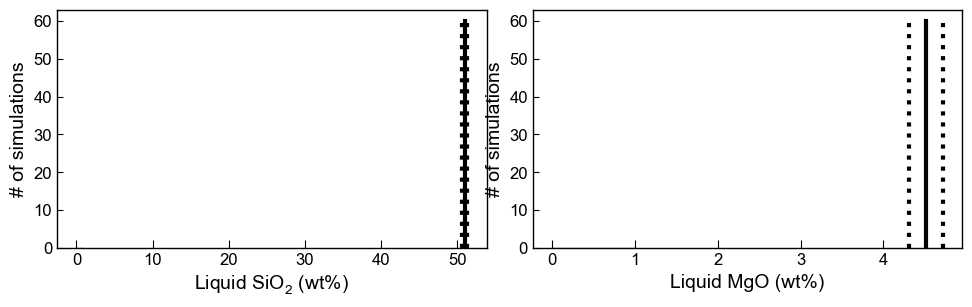

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
ax1.hist(Syn_Liqs_e142['SiO2_Liq'], bins=50, ec='grey', color='plum');
ax1.plot([Real_Liq_e142['SiO2_Liq'], Real_Liq_e142['SiO2_Liq']],
         [0, 60], '-k', lw=3)
ax1.plot([Real_Liq_e142['SiO2_Liq']+Real_Liq_e142_Err['SiO2_Liq_Err'], 
          Real_Liq_e142['SiO2_Liq']+Real_Liq_e142_Err['SiO2_Liq_Err']],
         [0, 60], ':k', lw=3)
ax1.plot([Real_Liq_e142['SiO2_Liq']-Real_Liq_e142_Err['SiO2_Liq_Err'], 
          Real_Liq_e142['SiO2_Liq']-Real_Liq_e142_Err['SiO2_Liq_Err']],
         [0, 60], ':k', lw=3)
ax1.set_ylabel('# of simulations')
fig.tight_layout()
ax1.set_xlabel('Liquid SiO$_2$ (wt%)')

ax2.hist(Syn_Liqs_e142['MgO_Liq'], bins=50, ec='grey', color='plum');
ax2.plot([Real_Liq_e142['MgO_Liq'], Real_Liq_e142['MgO_Liq']],
         [0, 60], '-k', lw=3)
ax2.plot([Real_Liq_e142['MgO_Liq']+Real_Liq_e142_Err['MgO_Liq_Err'], 
          Real_Liq_e142['MgO_Liq']+Real_Liq_e142_Err['MgO_Liq_Err']],
         [0, 60], ':k', lw=3)
ax2.plot([Real_Liq_e142['MgO_Liq']-Real_Liq_e142_Err['MgO_Liq_Err'], 
          Real_Liq_e142['MgO_Liq']-Real_Liq_e142_Err['MgO_Liq_Err']],
         [0, 60], ':k', lw=3)
ax2.set_ylabel('# of simulations')
ax2.set_xlabel('Liquid MgO (wt%)')

fig.savefig('Simulated_SiO2_e142.png', dpi=200, bbox_inches='tight')

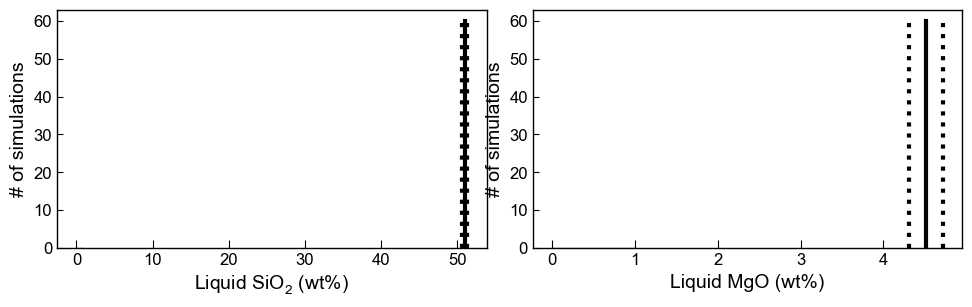

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
ax1.hist(Syn_Liqs_e142['SiO2_Liq'], bins=50, ec='grey', color='plum');
ax1.plot([Real_Liq_e142['SiO2_Liq'], Real_Liq_e142['SiO2_Liq']],
         [0, 60], '-k', lw=3)
ax1.plot([Real_Liq_e142['SiO2_Liq']+Real_Liq_e142_Err['SiO2_Liq_Err'], 
          Real_Liq_e142['SiO2_Liq']+Real_Liq_e142_Err['SiO2_Liq_Err']],
         [0, 60], ':k', lw=3)
ax1.plot([Real_Liq_e142['SiO2_Liq']-Real_Liq_e142_Err['SiO2_Liq_Err'], 
          Real_Liq_e142['SiO2_Liq']-Real_Liq_e142_Err['SiO2_Liq_Err']],
         [0, 60], ':k', lw=3)
ax1.set_ylabel('# of simulations')
fig.tight_layout()
ax1.set_xlabel('Liquid SiO$_2$ (wt%)')

ax2.hist(Syn_Liqs_e142['MgO_Liq'], bins=50, ec='grey', color='plum');
ax2.plot([Real_Liq_e142['MgO_Liq'], Real_Liq_e142['MgO_Liq']],
         [0, 60], '-k', lw=3)
ax2.plot([Real_Liq_e142['MgO_Liq']+Real_Liq_e142_Err['MgO_Liq_Err'], 
          Real_Liq_e142['MgO_Liq']+Real_Liq_e142_Err['MgO_Liq_Err']],
         [0, 60], ':k', lw=3)
ax2.plot([Real_Liq_e142['MgO_Liq']-Real_Liq_e142_Err['MgO_Liq_Err'], 
          Real_Liq_e142['MgO_Liq']-Real_Liq_e142_Err['MgO_Liq_Err']],
         [0, 60], ':k', lw=3)
ax2.set_ylabel('# of simulations')
ax2.set_xlabel('Liquid MgO (wt%)')

fig.savefig('Simulated_SiO2_e142.png', dpi=200, bbox_inches='tight')

In [34]:
Syn_Cpxs_e142['Na2O_Cpx']

Series([], Name: Na2O_Cpx, dtype: float64)

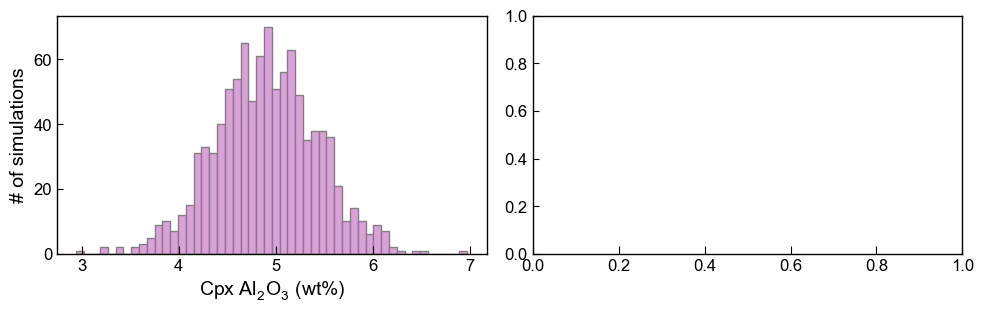

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
ax1.hist(Real_Cpx_e142['Al2O3_Cpx'], bins=50, ec='grey', color='plum');

ax1.set_ylabel('# of simulations')
fig.tight_layout()
ax1.set_xlabel('Cpx Al$_2$O$_3$ (wt%)')



fig.savefig('Simulated_Na2O_e142.png', dpi=200, bbox_inches='tight')

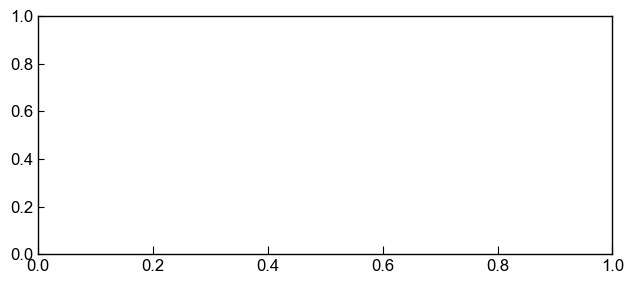

In [25]:
fig, (ax1) = plt.subplots(1, figsize=(6.5,3))

fig.tight_layout()
fig.savefig('Simulated_MgO_e142.png', dpi=200, bbox_inches='tight')

In [ ]:
Real_Liq_e142_Err

# Step 4 - Calculate pressures and temperatures iteratively for these new dataframes

In [27]:
Cpx_Liq_with_noise=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_st_noise, cpx_comps=Cpxs_st_noise, 
             equationP="P_Put2008_eq31", equationT="T_Put2008_eq33", eq_tests=True)

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


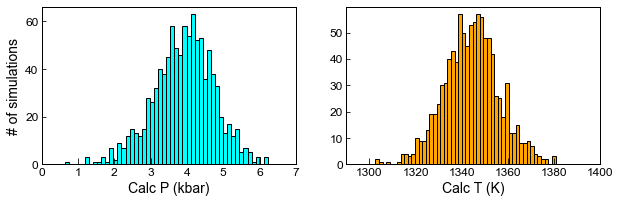

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,2.9))

ax1.hist(Cpx_Liq_with_noise['P_kbar_calc'].loc[Cpx_Liq_with_noise['Sample_ID_Cpx']==0], bins=50, ec='k', color='cyan');
ax2.hist(Cpx_Liq_with_noise['T_K_calc'].loc[Cpx_Liq_with_noise['Sample_ID_Cpx']==0], bins=50, ec='k', color='orange');
ax1.set_xlim([0, 7])
ax2.set_xlim([1290, 1400])
ax1.set_xlabel('Calc P (kbar)')
ax2.set_xlabel('Calc T (K)')
ax1.set_ylabel('# of simulations')
fig.savefig('MC_example.png', dpi=300, bbox_inches='tight')
#ax3.plot(Cpx_Liq_with_noise['P_kbar_calc'], Cpx_Liq_with_noise['T_K_calc'], '.k')

# Step 5 - Calculate statistics for each inputted cpx-liq pair

In [24]:
Stats_P_kbar=pt.av_noise_samples_series(calc=Cpx_Liq_with_noise['P_kbar_calc'], 
                            sampleID=Cpx_Liq_with_noise['Sample_ID_Liq'])
Stats_P_kbar.head()

g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\noise_averaging.py:38: RuntimeWarning: Mean of empty slice
  Av_mean[i] = np.nanmean(calc[sampleID == i])
C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\penny\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


ValueError: zero-size array to reduction operation minimum which has no identity

In [33]:
Stats_P_kbar=pt.av_noise_samples_df(dataframe=Out_st_noise['P_kbar_calc'], 
                calc_heading='P_kbar_calc', ID_heading='Sample_ID_Liq_Num')
Stats_P_kbar.head()


KeyError: 'calc_heading'

In [25]:
Stats_P_kbar=pt.av_noise_samples_series(Out_st_noise['P_kbar_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_P_kbar

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Sample,Mean_calc,Median_calc,St_dev_calc,Max_calc,Min_calc
0,0.0,3.889951,3.940285,0.839779,6.077707,0.137175
1,1.0,3.447472,3.724100,1.756871,6.548999,-17.761073
2,2.0,3.942508,4.174495,2.110455,8.883845,-6.526874
3,3.0,4.446269,4.531242,0.905539,6.821825,0.058097
4,4.0,5.886842,5.922160,0.924334,8.584534,2.320500
5,5.0,8.104927,8.114702,0.478385,9.407493,6.546494
6,6.0,6.203717,6.225493,0.503343,7.446004,3.775613


# Step 6 - Plot histogram for each user-entered row

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

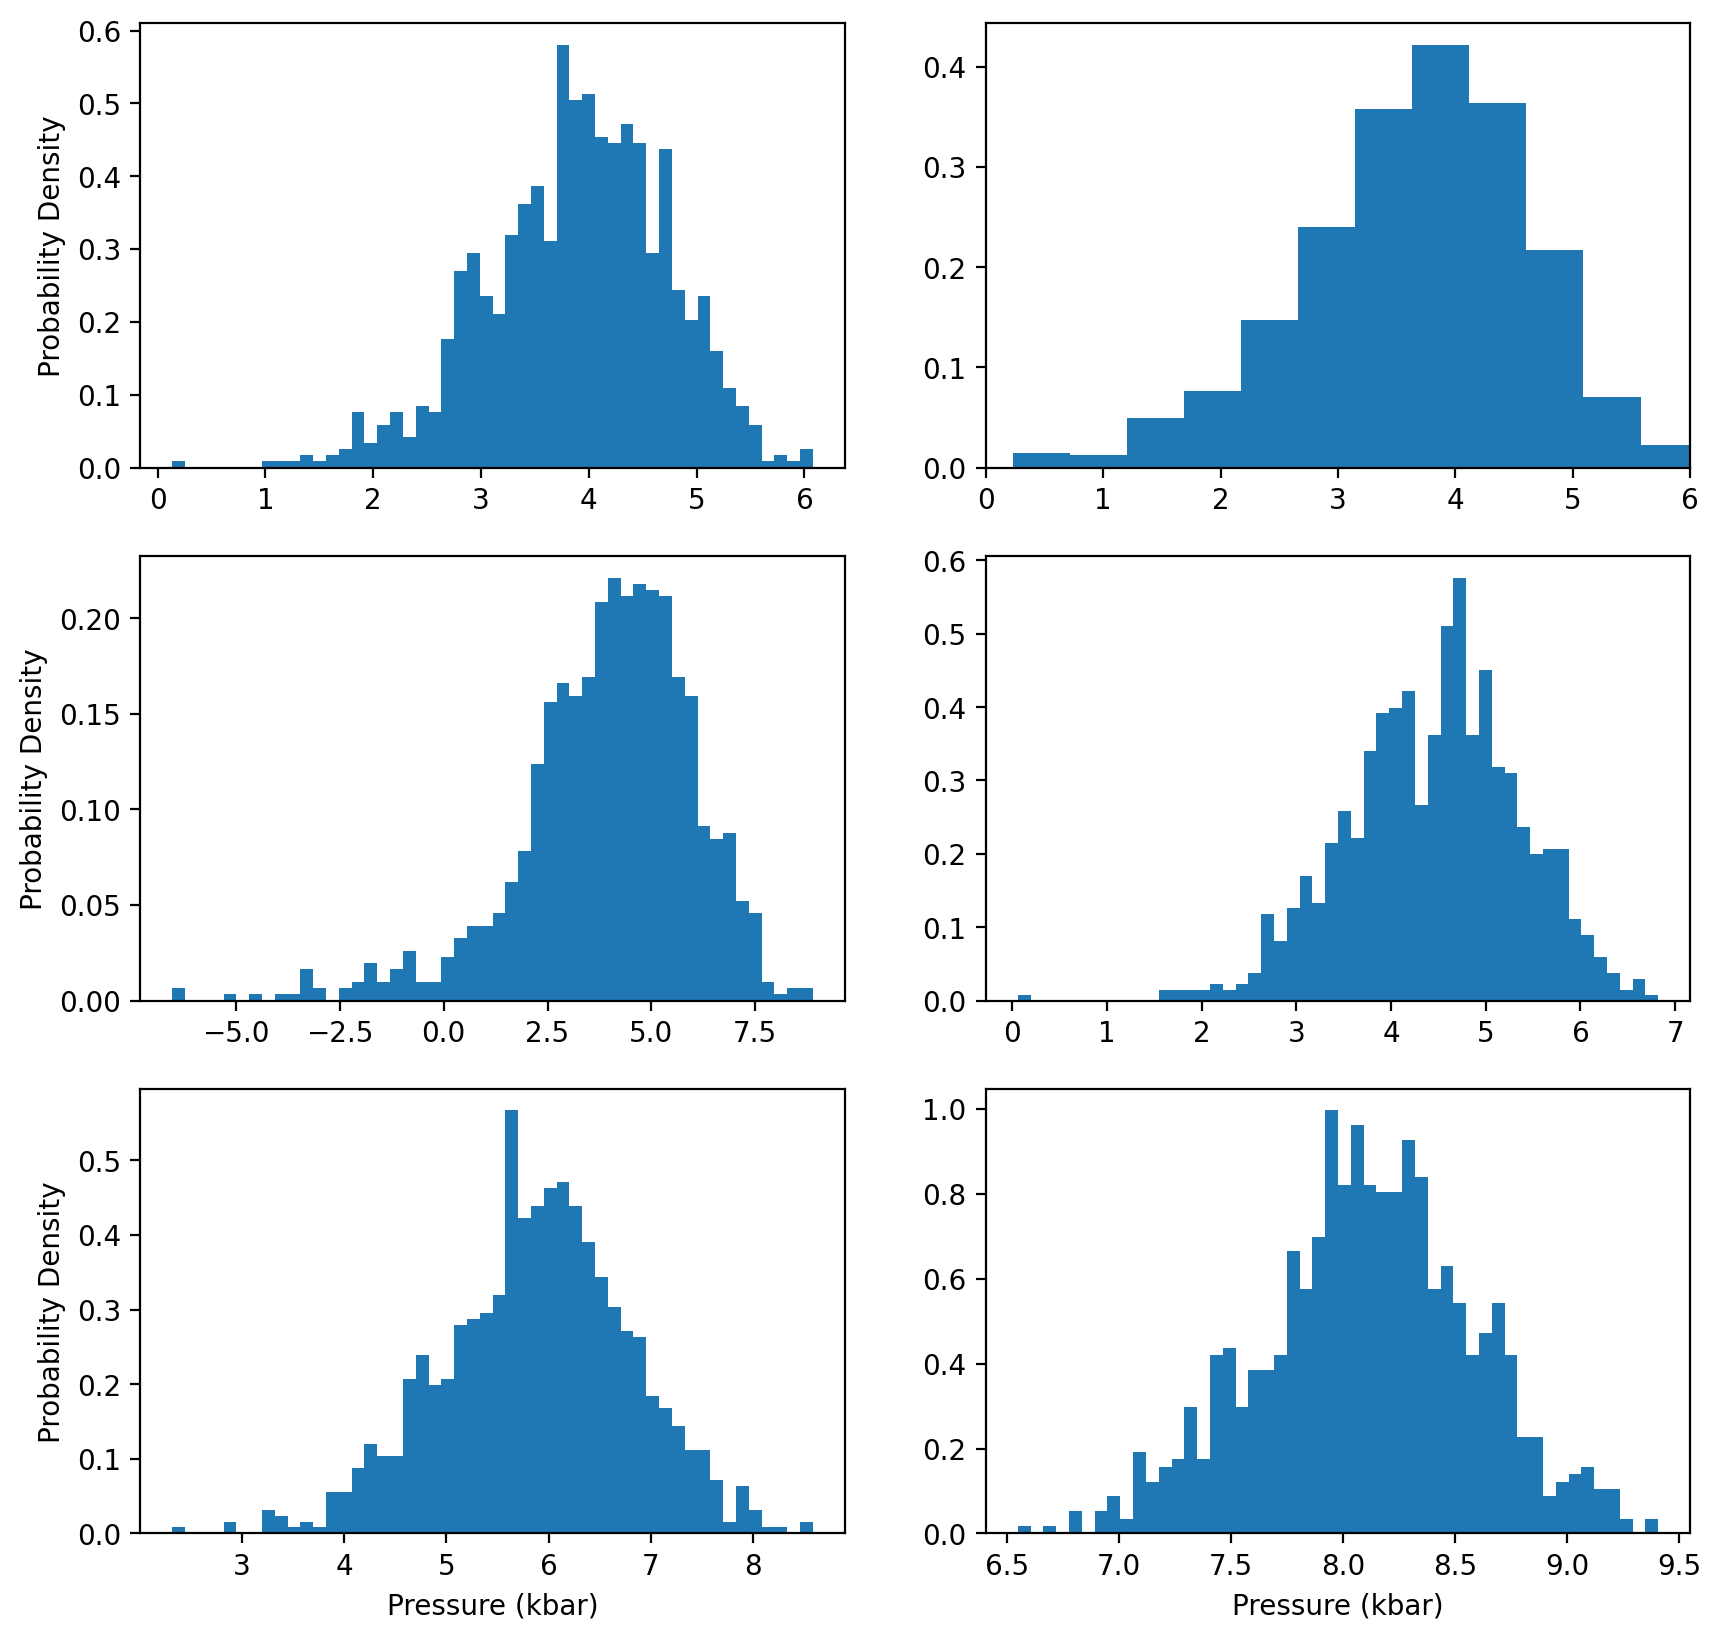

In [26]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Liq_Num']==0, "P_kbar_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Liq_Num']==1, "P_kbar_calc"], bins=50, density = True)
ax2.set_xlim([0, 6])
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax2.set_ylabel('Probability Density')


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

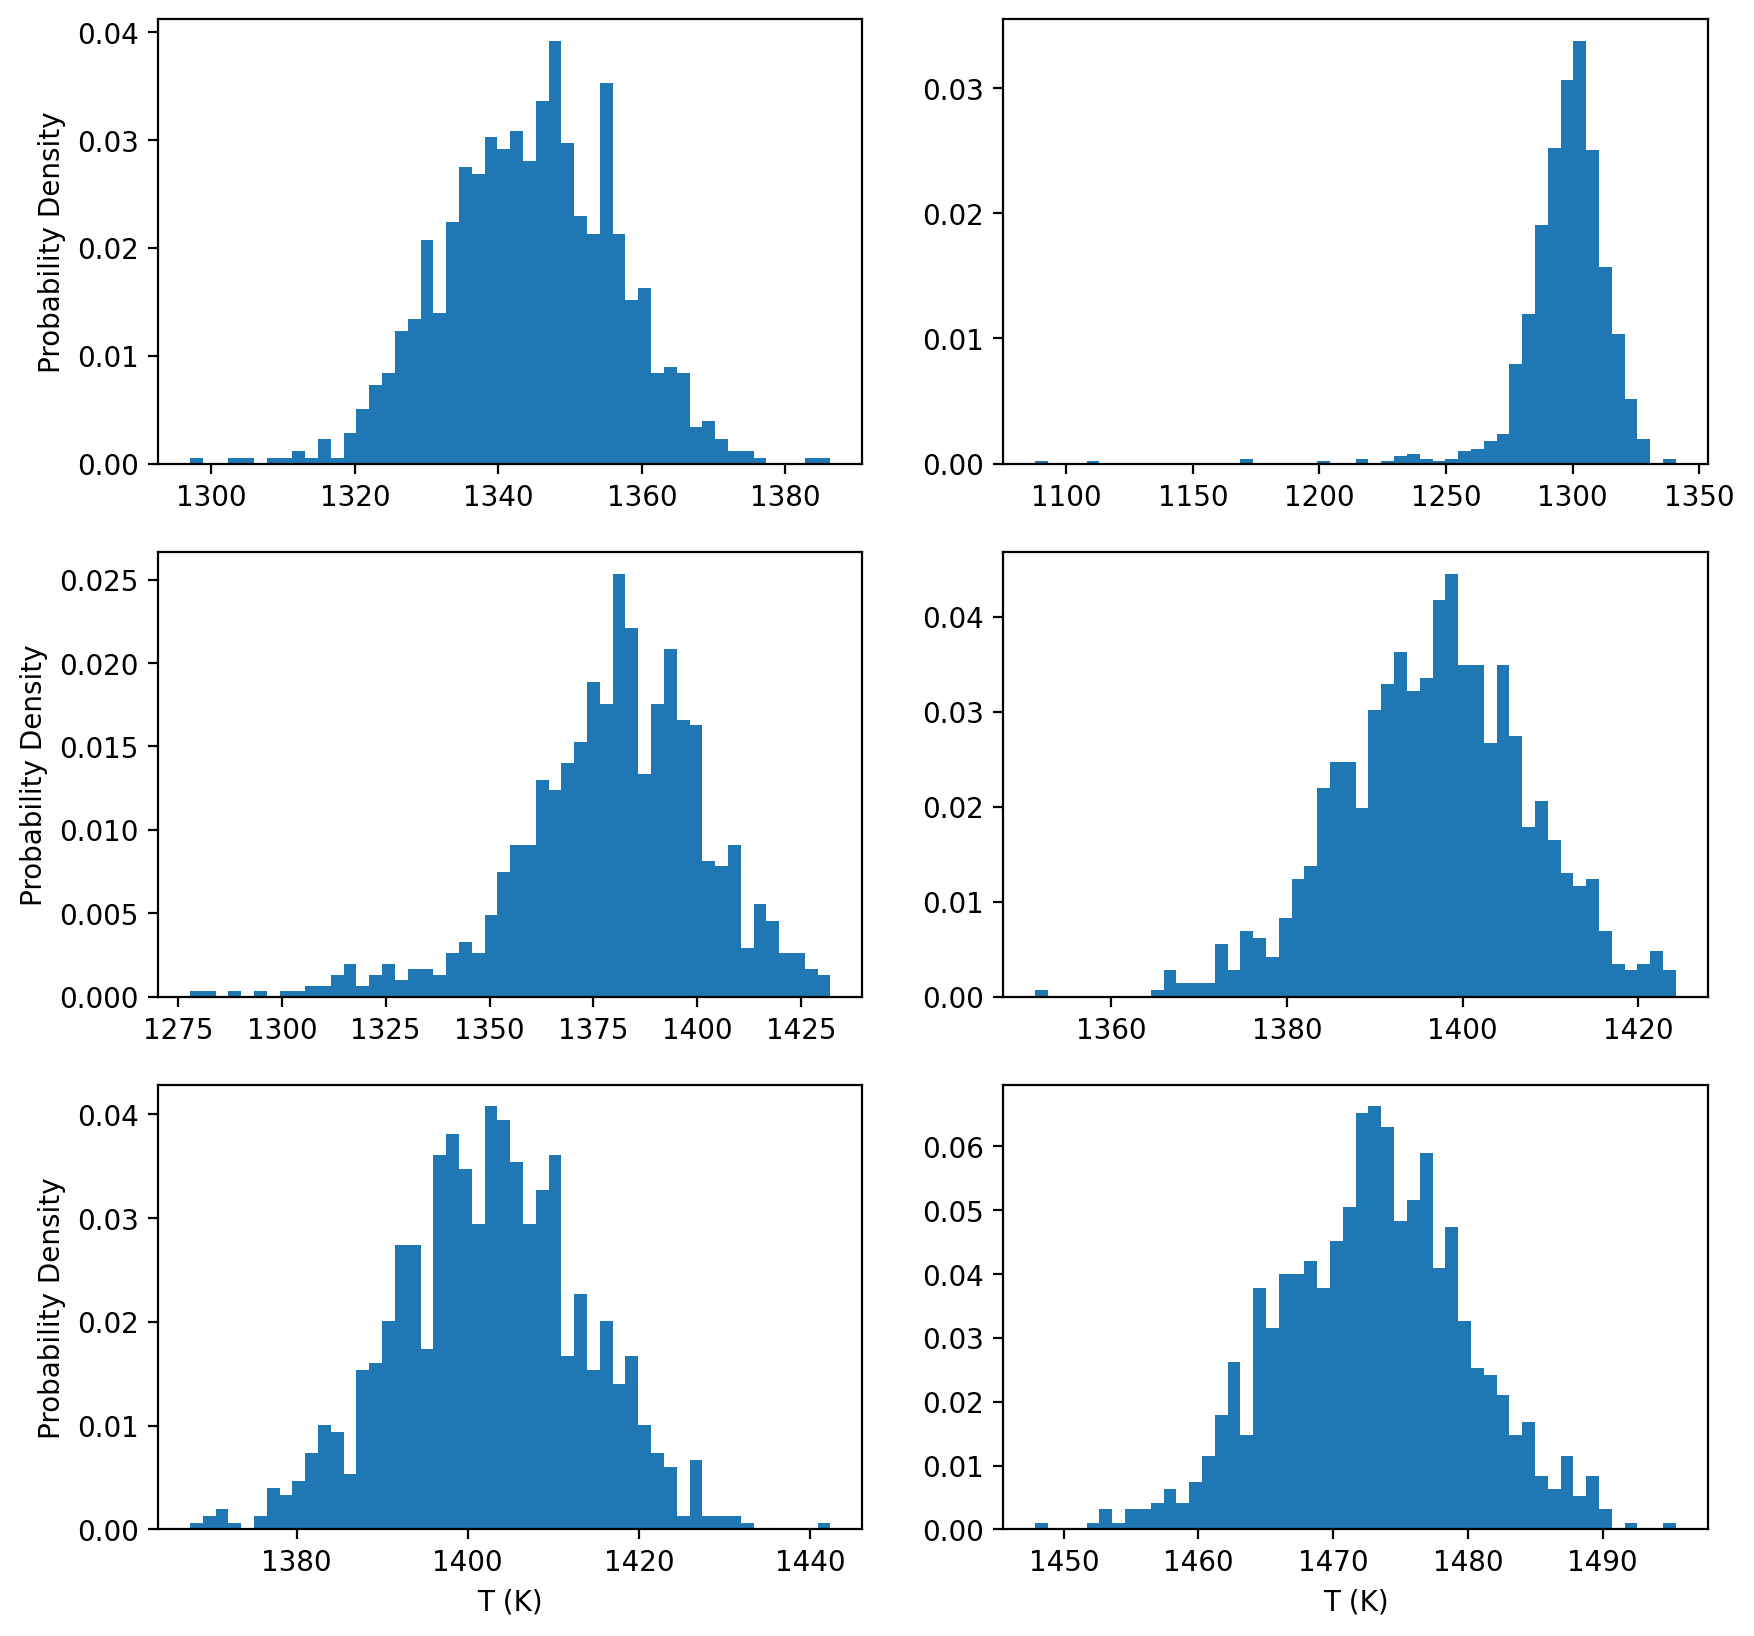

In [27]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, 'Probability Density')

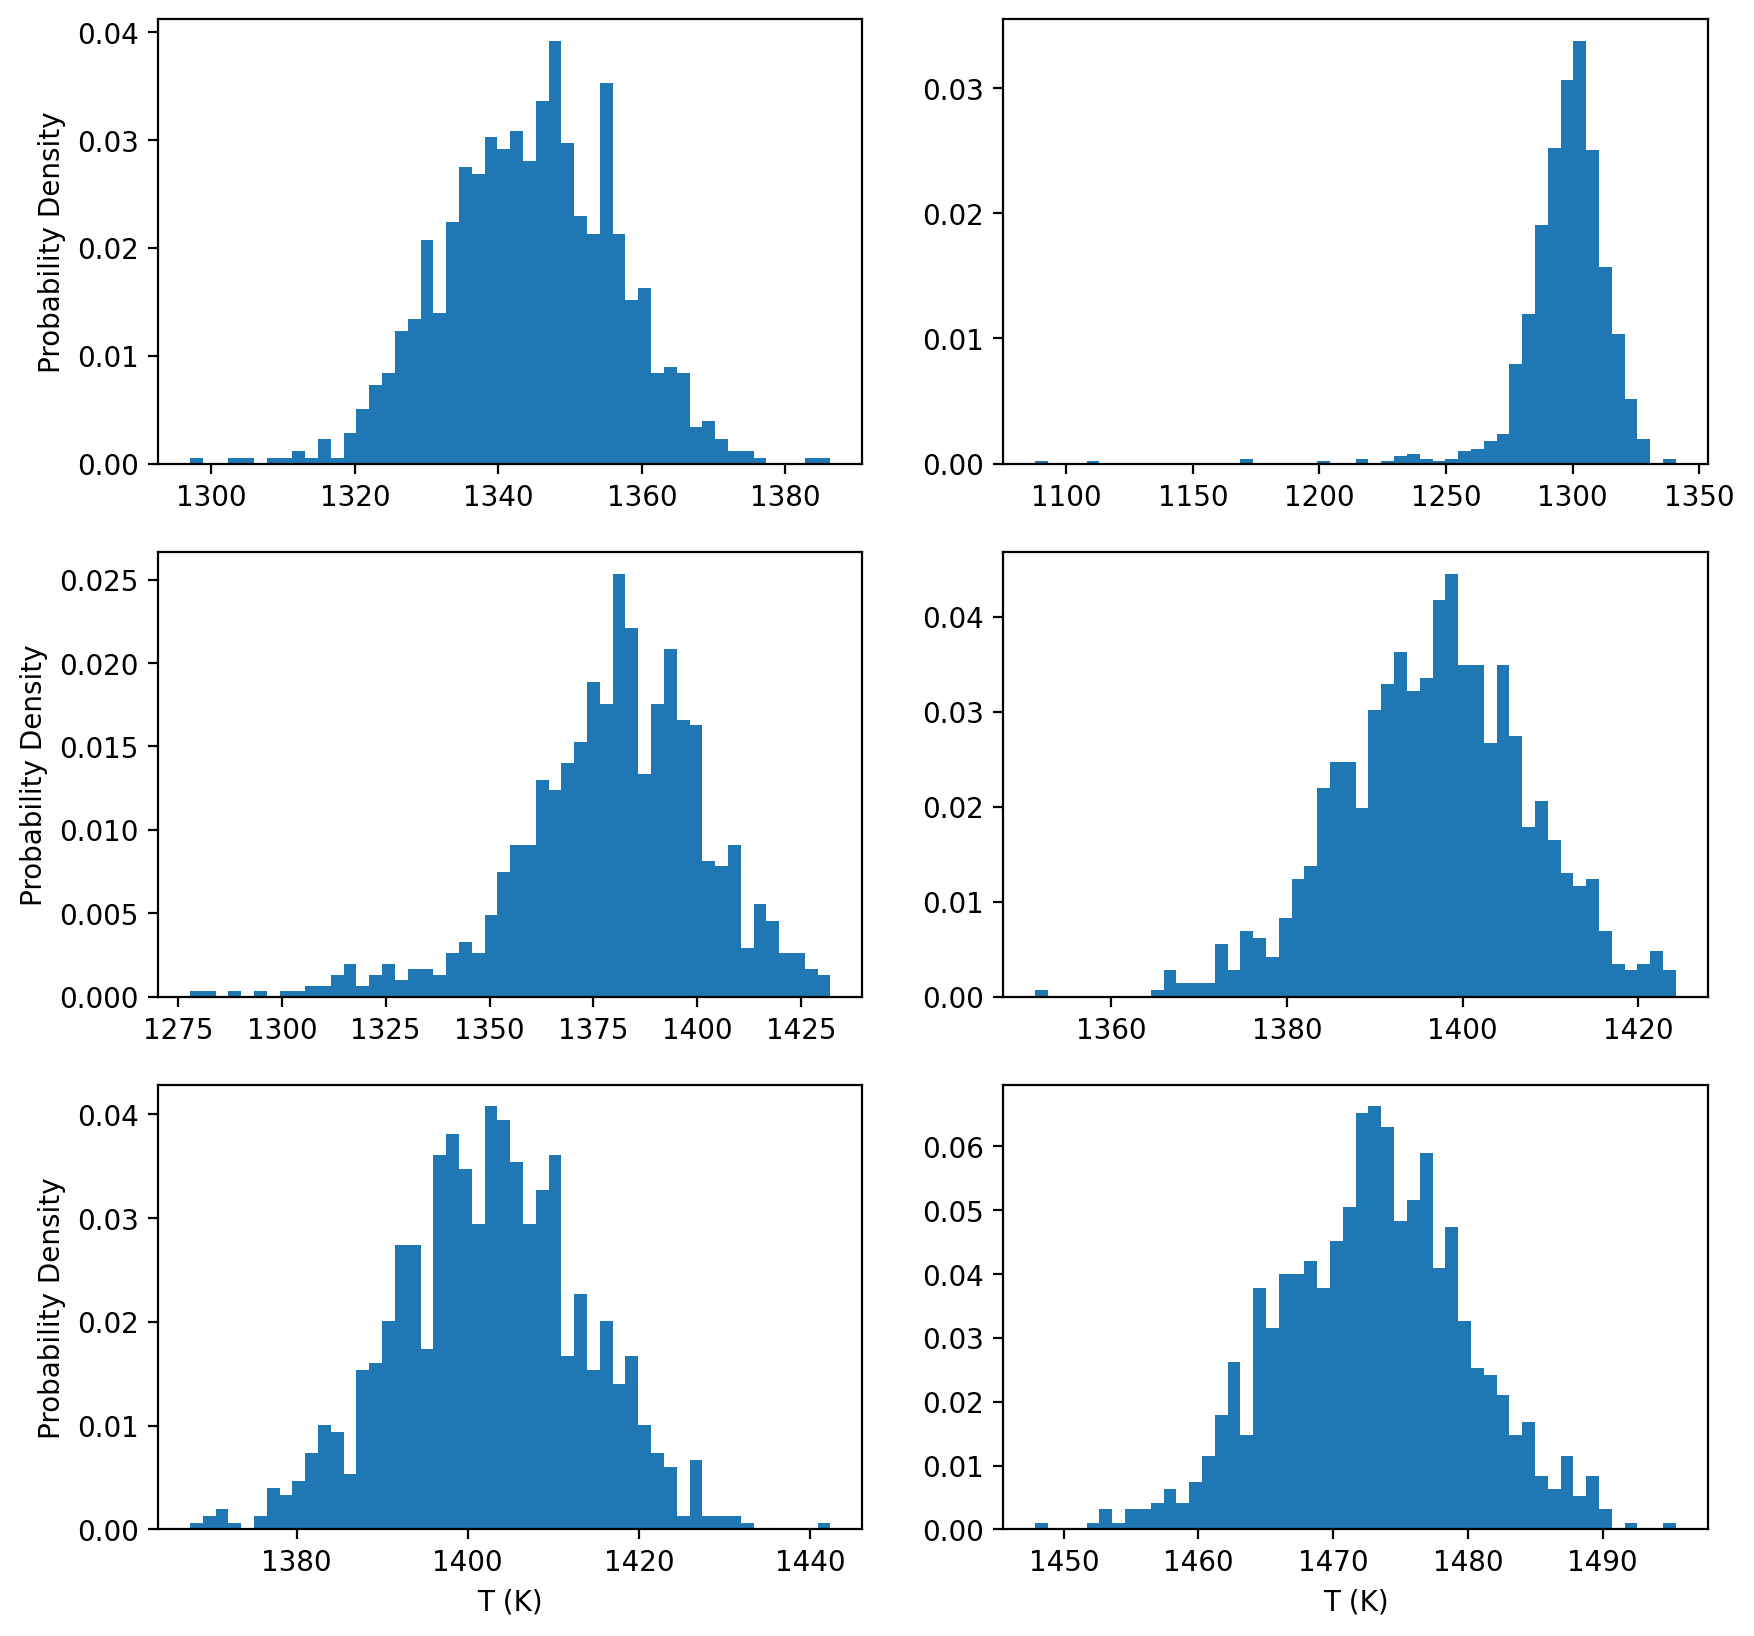

In [29]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

## Other snips

In [6]:
myCpxs=myCpxs1

In [8]:
pt.calculate_cpx_only_press_temp(
cpx_comps=myCpxs, equationP="P_Put2008_eq32b",
equationT="T_Put2008_eq32d")

,P_kbar_calc,T_K_calc
0,5.330423,1487.588565
1,4.912641,1476.307186
2,5.904306,1501.021450
3,6.166675,1498.053851
4,7.700500,1506.447225
5,10.005245,1535.593208
6,5.545181,1496.359027
